<a href="https://colab.research.google.com/github/Marcosias0400/Geometria_Algoritmica/blob/main/FloydTriangulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modulos necesarios

In [ ]:
import numpy as np
from sympy.geometry import *
import matplotlib.pyplot as plt

In [ ]:
def floyd(ady:np.array)->list:
  n=len(ady)
  T=np.ndarray((n,n),dtype=np.float32)
  # Matriz auxiliar
  for i in range(n):
    for j in range(n):
      if i==j:
        T[i][j]=np.nan
      else:
        T[i][j]=j
  for k in range(n):
    for i in range(n):
      for j in range(n):
        if i!=j:
          if ady[k][j]+ady[i][k]<ady[i][j]:
            ady[i][j]=ady[k][j]+ady[i][k]
            T[i][j]=k
  return [ady, T]

In [ ]:
def adyacencia(M:list)->np.array:
  mat=[[0]*len(M)]*len(M)
  for i in M:
    mat[i[0]][i[1]]=1
  ady=np.array(mat)
  return ady

Prueba de matriz de adyacencia

In [ ]:
A=np.array([[np.nan,2,1,4],[np.inf,np.nan,3,2],[1,3,np.nan,np.inf],[4,2,6,np.nan]])
print('Matriz de adyacencia:\n'+str(A))
X,Y=floyd(A)
print('matriz de peso minimo:\n'+str(X)+'\n'+'Matriz de Trayectorias:\n'+str(Y)+'\n')

Matriz de adyacencia:
[[nan  2.  1.  4.]
 [inf nan  3.  2.]
 [ 1.  3. nan inf]
 [ 4.  2.  6. nan]]
matriz de peso minimo:
[[nan  2.  1.  4.]
 [ 4. nan  3.  2.]
 [ 1.  3. nan  5.]
 [ 4.  2.  5. nan]]
Matriz de Trayectorias:
[[nan  1.  2.  3.]
 [ 2. nan  2.  3.]
 [ 0.  1. nan  0.]
 [ 0.  1.  0. nan]]



In [ ]:
def read_poly(file_name):
  output = {'vertices': None,'holes': None,'segments': None}
  # open file and store lines in a list
  file = open(file_name, 'r')
  lines = file.readlines()
  file.close()
  lines = [x.strip('\n').split() for x in lines]
  # Store vertices
  vertices= []
  N_vertices,dimension,attr,bdry_markers = [int(x) for x in lines[0]]
  # We assume attr = bdrt_markers = 0
  for k in range(N_vertices):
    label,x,y = [items for items in lines[k+1]]
    vertices.append([float(x), float(y)])
  output['vertices']=np.array(vertices)
  # Store segments
  segments = []
  N_segments,bdry_markers = [int(x) for x in lines[N_vertices+1]]
  for k in range(N_segments):
    label,pointer_1,pointer_2 = [items for items in lines[N_vertices+k+2]]
    segments.append([int(pointer_1)-1, int(pointer_2)-1])
  output['segments'] = np.array(segments)
  # Store holes
  N_holes = int(lines[N_segments+N_vertices+2][0])
  holes = []
  for k in range(N_holes):
    label,x,y = [items for items in lines[N_segments + N_vertices + 3 +  k]]
    holes.append([float(x), float(y)])
  output['holes'] = np.array(holes)
  return output

CPU times: user 482 µs, sys: 481 µs, total: 963 µs
Wall time: 974 µs
CPU times: user 49.9 ms, sys: 425 µs, total: 50.3 ms
Wall time: 68.2 ms


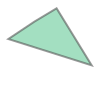

In [ ]:
from scipy.spatial import ConvexHull

DPuntos = read_poly("pol1.poly")
vertices_ls = DPuntos['vertices']
%time hull = ConvexHull(vertices_ls)

vertices_sympy = [Point(x) for x in vertices_ls]
%time convex_hull(*vertices_sympy)

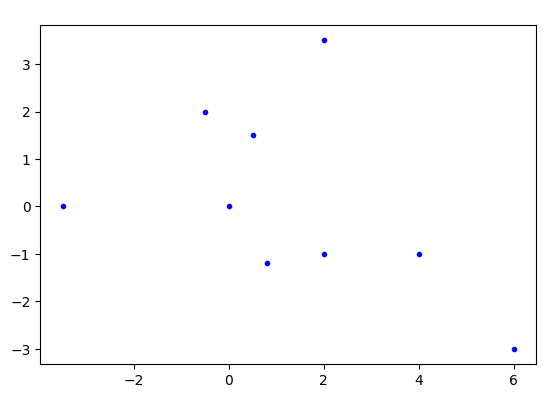

In [ ]:
plt.figure()
plt.xlim(vertices_ls[:,0].min()-0.01,vertices_ls[:,0].max()+0.01)
plt.ylim(vertices_ls[:,1].min()-0.01,vertices_ls[:,1].max()+0.01)
plt.axis('off')
plt.axes().set_aspect('equal')
plt.plot(vertices_ls[:,0], vertices_ls[:,1], 'b.')

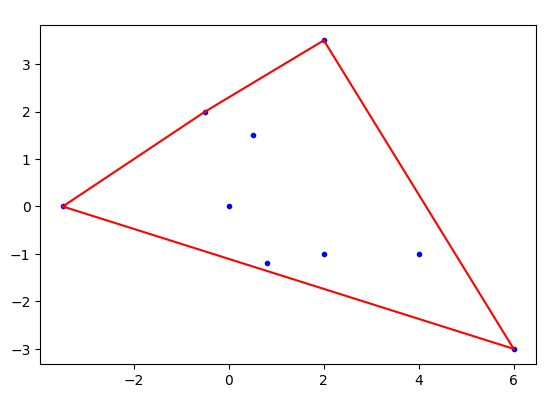

In [ ]:
plt.figure()
plt.xlim(vertices_ls[:,0].min()-0.01,vertices_ls[:,0].max()+0.01)
plt.ylim(vertices_ls[:,1].min()-0.01,vertices_ls[:,1].max()+0.01)
plt.axis('off')
plt.axes().set_aspect('equal')
plt.plot(vertices_ls[:,0], vertices_ls[:,1], 'b.')
for simplex in hull.simplices:
  plt.plot(vertices_ls[simplex, 0],vertices_ls[simplex, 1], 'r-')
plt.show()

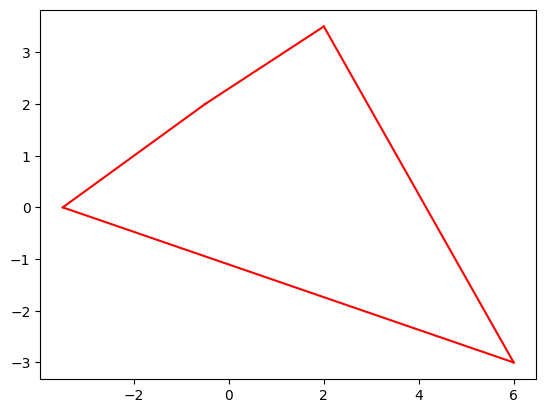

In [ ]:
for simplex in hull.simplices:
  plt.plot(vertices_ls[simplex, 0],vertices_ls[simplex, 1], 'r-')
plt.show()

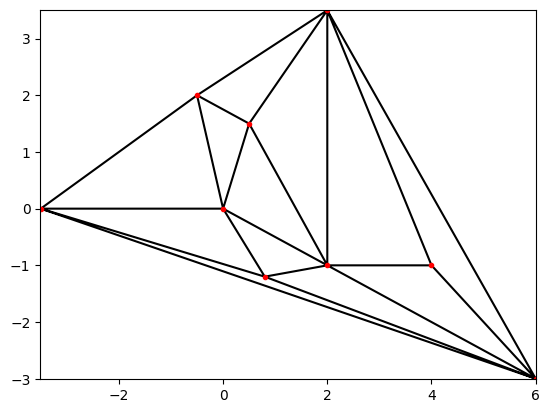

In [ ]:
from scipy.spatial import Delaunay

DPuntos = read_poly("pol1.poly")
vertices_ls = DPuntos['vertices']

tri = Delaunay(vertices_ls)

plt.figure()
plt.xlim(vertices_ls[:,0].min()-0.01,vertices_ls[:,0].max()+0.01)
plt.ylim(vertices_ls[:,1].min()-0.01,vertices_ls[:,1].max()+0.01)
#plt.axes().set_aspect('equal')
plt.axis('on')
plt.triplot(vertices_ls[:,0], vertices_ls[:,1],tri.simplices, 'k-')
plt.plot(vertices_ls[:,0], vertices_ls[:,1], 'r.')
plt.show()